In [5]:
#1 find S
import pandas as pd
import numpy as np

data=pd.read_csv(r"C:\Users\harik\Downloads\Sport.csv")
data

data1=data.drop(['Example','EnjoySport'],axis=1,inplace=False)
data1

h=[]
h.append(['phi','phi','phi','phi','phi','phi'])
print(h)
for i in range(0,data.shape[0]):
    if(data['EnjoySport'][i]=='Yes'):
        l=list(data1.iloc[i])
        l1=[]
        for j in range(0,len(l)):
            if(h[i][j]!=l[j] and h[i][j]=='phi'):
                l1.append(l[j])
            elif(h[i][j]!=l[j]):
                l1.append('?')
            else:
                l1.append(h[i][j])
        h.append(l1)
        print(h[i+1])
    else:
        h.append(h[i])
        print(h[i+1])

[['phi', 'phi', 'phi', 'phi', 'phi', 'phi']]
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [48]:
#2 candidate elimination

import pandas as pd
data = pd.read_csv(r"C:\Users\harik\Downloads\Sport.csv")
data1=data.drop(['Example'],axis=1,inplace=False)
data1
h = ['phi','phi','phi','phi','phi','phi']
print("Initial Hypothesis:", h)
for i, row in data1.iterrows():
    if row['EnjoySport'] == 'Yes':  # If example is positive
        for j in range(len(h)):
            if h[j] != row[j] and h[j] == 'phi':
                h[j] = row[j]
            elif h[j] != row[j]:
                h[j] = '?'
        print("Updated Hypothesis (Positive Example):", h)
    else:  # If example is negative
        print("Hypothesis (Negative Example):", h)


Initial Hypothesis: ['phi', 'phi', 'phi', 'phi', 'phi', 'phi']
Updated Hypothesis (Positive Example): ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Updated Hypothesis (Positive Example): ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Hypothesis (Negative Example): ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Updated Hypothesis (Positive Example): ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [18]:
#3 naive  bayes

data = pd.read_csv(r'C:\Users\harik\Downloads\play_tennis.csv')

df = pd.DataFrame(data)
display(df)
play_counts = df['play'].value_counts()

# Function to calculate probability for a given feature
def calculate_probability(feature):
    probabilities = {}
    for value in df[feature].unique():
        counts = df[df[feature] == value]['play'].value_counts()
        probabilities[value] = {
            'Yes': counts.get('Yes', 0) / play_counts['Yes'],
            'No': counts.get('No', 0) / play_counts['No']
        }
    return probabilities

outlook_pro = calculate_probability('outlook')


temp_pro  = calculate_probability('temp')


humidity_pro  = calculate_probability('humidity')
play_c = pd.DataFrame(play_counts) 
wind_pro  = calculate_probability('wind')

outlook = pd.DataFrame(outlook_pro)
temp = pd.DataFrame(temp_pro)
humidity = pd.DataFrame(humidity_pro)
wind = pd.DataFrame(wind_pro)
display(play_c)
display(outlook)
display(temp)
display(humidity)
display(wind)


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


,count
play,
Yes,9
No,5


,Sunny,Overcast,Rain
Yes,0.222222,0.444444,0.333333
No,0.600000,0.000000,0.400000


,Hot,Mild,Cool
Yes,0.222222,0.444444,0.333333
No,0.400000,0.400000,0.200000


,High,Normal
Yes,0.333333,0.666667
No,0.800000,0.200000


,Weak,Strong
Yes,0.666667,0.333333
No,0.400000,0.600000


In [19]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)

df = pd.DataFrame(data)
df_numerical = pd.get_dummies(df[['outlook', 'temp', 'humidity', 'wind']])

display(df_numerical)
df_final = pd.concat([df_numerical, df['play']], axis=1)
train_data, test_data = train_test_split(df_final,shuffle=False)
X_train = train_data.drop('play', axis=1)
y_train = train_data['play']


X_test = test_data.drop('play', axis=1)
y_test = test_data['play']
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_pred,y_test,average='weighted')
display(f1)
display("the acutal values:",y_test)
print("the predicted values:",y_pred)


,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


Accuracy: 0.75


0.7333333333333334

'the acutal values:'

10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

the predicted values: ['No' 'Yes' 'Yes' 'No']


In [27]:
#4 naive bayes text classifier

import pandas as pd
msg = pd.read_csv(r'C:\Users\harik\Downloads\text_classification.csv', names=['message', 'label'])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})
print(msg)
x = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)
print(Xtrain)
print(ytrain)
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()
Xtrain_dm =count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)
print(count_v.get_feature_names_out())
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, pred))

                                 message label  labelnum
0                   I love this sandwich   pos         1
1               this is an amazing place   pos         1
2     I feel very good about these beers   pos         1
3                   this is my best work   pos         1
4                   what an awesome view   pos         1
5          I do not like this restaurant   neg         0
6               I am tired of this stuff   neg         0
7                 I can't deal with this   neg         0
8                   he is my sworn enemy   neg         0
9                    my boss is horrible   neg         0
10              this is an awesome place   pos         1
11  I donot like the taste of this juice   neg         0
12                       I love to dance   pos         1
13     I am sick and tired of this place   neg         0
14                  what a great holiday   pos         1
15        that is a bad locality to stay   neg         0
16        we will have good fun

In [29]:
#5 bayesian bilief networks

import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
heartDisease = pd.read_csv('./heart.csv')
heartDisease = heartDisease.replace('?', np.nan)
print("Sample instances from dataset are given below:")
print(heartDisease.head())
print("Attributes and datatypes: ")
print(heartDisease.dtypes)
model = BayesianNetwork([('age', 'target'), ('sex', 'target'), ('exang', 'target'), ('cp', 'target'), ('target', 'restecg'), \
                      ('target', 'chol')])
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)
print("Inferencing with Bayesian Network: ")
HeartDisease_infer = VariableElimination(model)
print('1. Probability of HeartDisease given evidence =restecg :1')
q1 = HeartDisease_infer.query(variables=['target'], evidence={"restecg": 1})
print(q1)

print('\n2. Probability of HeartDisease given evidence = cp:2')
q2 = HeartDisease_infer.query(variables=['target'], evidence={"cp": 2})
print(q2)

In [50]:
#6 ID3

import pandas as pd
import numpy as np
import math
df = pd.read_csv(r'C:\Users\harik\Downloads\play_tennis.csv')
df=df.drop("day",axis=1)
df
def entropy(s):
    p = s.loc[s['play']=='Yes']
    n = s.loc[s['play']=='No']
    entropy = 0
    if (p.shape[0] == 0 or n.shape[0] == 0):
        return 0
    entropy = -p.shape[0] / s.shape[0] * math.log2(p.shape[0]/s.shape[0]) - \
                n.shape[0]/s.shape[0] * math.log2(n.shape[0]/s.shape[0])
    return entropy
def gain(s, a):
    gain = entropy(s)
    for value in s[a].unique():
        gain -= (s[s[a]==value].shape[0] / s.shape[0]) * entropy(s[s[a]==value])
    return gain
attributes = set(df.columns[:-1])

display(attributes)
{'humidity', 'outlook', 'temp', 'wind'}
def id3(X, target, attrs):
    tree = {}
    targetCounts = X[target].value_counts()
    
    if X['play'].eq('Yes').all():
        return 'Yes'
    elif X['play'].eq('No').all():
        return 'No'
    elif len(attrs) == 0:
        return 'Yes' if targetCounts['Yes'] > targetCounts['No'] else 'No'
    else:
        gains = [gain(X, a) for a in attrs]
        best = attrs[gains.index(max(gains))]
        tree = {best: {}}
        attrs.remove(best)
        for v in X[best].unique():
            xv = X.loc[X[best]==v]
            if len(xv) == 0:
                tree[best].update({v: 'Yes' if targetCounts['Yes'] > targetCounts['No'] else 'No'})
            tree[best].update({v: id3(xv, target, attrs)})
    return tree
data=df
target = "play"
att = list(df.columns[:-1])

tree = id3(data,target,att)
display(tree)
{'outlook': {'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}},
  'Overcast': 'Yes',
  'Rain': {'wind': {'Weak': 'Yes', 'Strong': 'No'}}}}
print("bulid jarvis")


{'humidity', 'outlook', 'temp', 'wind'}

{'outlook': {'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}},
  'Overcast': 'Yes',
  'Rain': {'wind': {'Weak': 'Yes', 'Strong': 'No'}}}}

bulid jarvis


In [32]:
#7 artificial neural networks


import numpy as np
import pandas as pd
data = pd.read_csv(r'C:\Users\harik\Downloads\NN.csv')
data
def NerualNetworks(training,target,weights,layers,n=0.95):
    for unit in weights:
        print(unit,":",end=" ")
        print(weights[unit])
    print("*************************")
    training  = training/ np.amax(training,axis=0)
    target=target / 100
    epochs = 5
    for row in range(len(training)):
        inputs,outputs,erros = [0]*5,[0]*5,[0]*5
        inputs[0],inputs[1] = training[row][0] , training[row][1]
        
        print(f"Normalized INputs:{training[row]}")
        print(f"Excepted Normalized Inputs:{target[row]}")
        
        for epoch in range(epochs):
            for i in layers.get('input',[]):
                outputs[i] = inputs[i]
                
            for j in layers.get('hidden',[]):
                inputs[j] = sum([weights[i][j]*outputs[i] for i in layers['input']]) + bais[j]
                outputs[j] = 1.0/(1+np.exp(-inputs[i]))
                
            for k in layers.get('output',[]):
                inputs[k] = sum([weights[j][k]*outputs[j] for j in layers['hidden']]) + bais[k]
                outputs[k] = 1.0/(1+np.exp(-inputs[k]))
                erros[k] = outputs[k]*(1-outputs[k]) * (target[i] - outputs[k])
            for i in layers.get("hidden",[]):
                erros[i] = outputs[i]*(1-outputs[i])*sum([erros[j]*weights[i][j] for j in layers.get("ouput",[])])
            for i in weights:
                for j in weights[i]:
                    dw = n*erros[j]*outputs[i]
                    weights[i][j]+=dw
            for i in layers["output"] + layers["hidden"]:
                db = n* erros[i]
                bais[i] += db
        print(f"After epoch {epochs}")
        print(f"output: {outputs[4]}")
training = data[['x','y']].to_numpy()
target = data['target'].to_numpy()
layers ={'input':[0,1],'hidden':[2,3],'output':[4]}
weights={}

for i in layers.get('input',[]):
    d={}
    for j in layers.get('hidden',[]):
        d[j] = np.random.uniform(-1,1)
    weights[i] = d
for i in layers.get('hidden',[]):
    d={}
    for j in layers.get('output',[]):
        d[j] = np.random.uniform(-1,1)
    weights[i] = d

bais = np.random.uniform(low=-1,high=1,size=(5,))

NerualNetworks(training,target,weights,layers, n = 0.95)

0 : {2: 0.9010387123013308, 3: 0.21804062985383643}
1 : {2: 0.7687614235322231, 3: -0.7952676256371034}
2 : {4: -0.37721337235341323}
3 : {4: -0.5455737879933116}
*************************
Normalized INputs:[0.66666667 1.        ]
Excepted Normalized Inputs:0.92
After epoch 5
output: 0.5544009124876857
Normalized INputs:[0.33333333 0.55555556]
Excepted Normalized Inputs:0.86
After epoch 5
output: 0.6803552893422347
Normalized INputs:[1.         0.66666667]
Excepted Normalized Inputs:0.89
After epoch 5
output: 0.7385076116370984


In [35]:
#8 EM using kmeans
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datas = datasets.load_iris()
#display(data)
X=pd.DataFrame(datas.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(datas.target)
y.columns=['Targets']
display(X)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 1.0, 'Real')

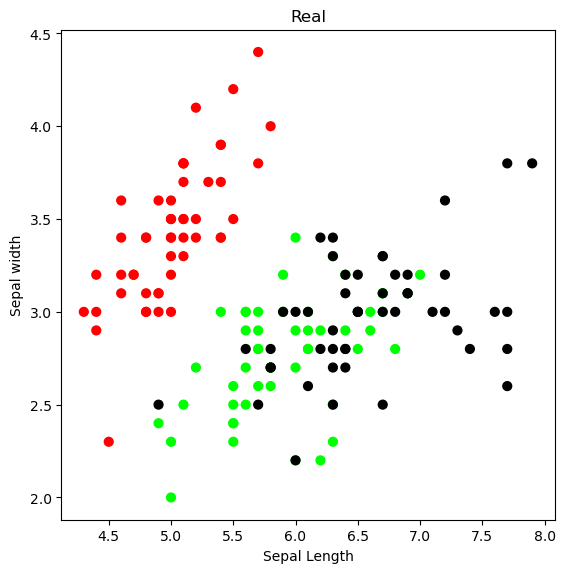

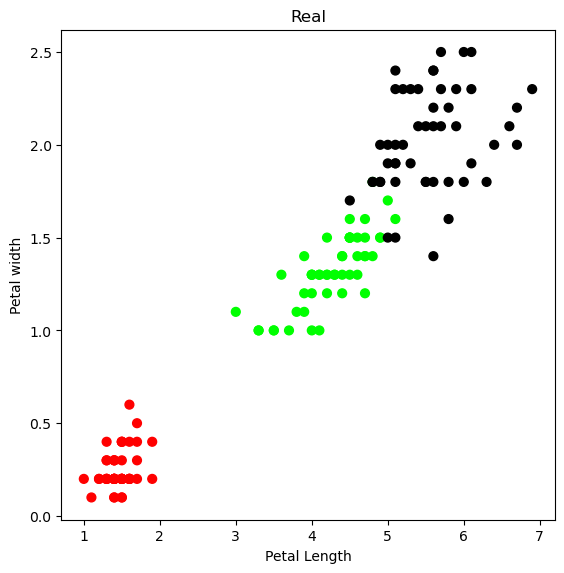

In [36]:
# REAL PLOT for original values
#sepal_Length
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])
#plt.subplot(1,3,1)
plt.subplot(2,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y.Targets],s=40)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('Real')

# REAL PLOT for original values
#petal_Length
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])
#plt.subplot(1,3,1)
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('Real')

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'KMeans')

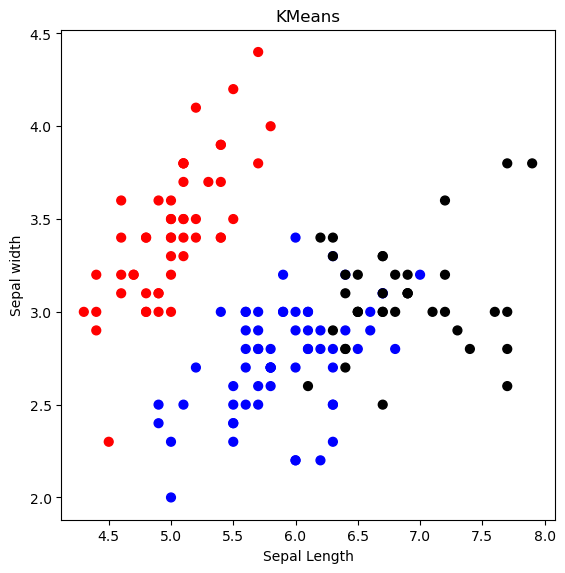

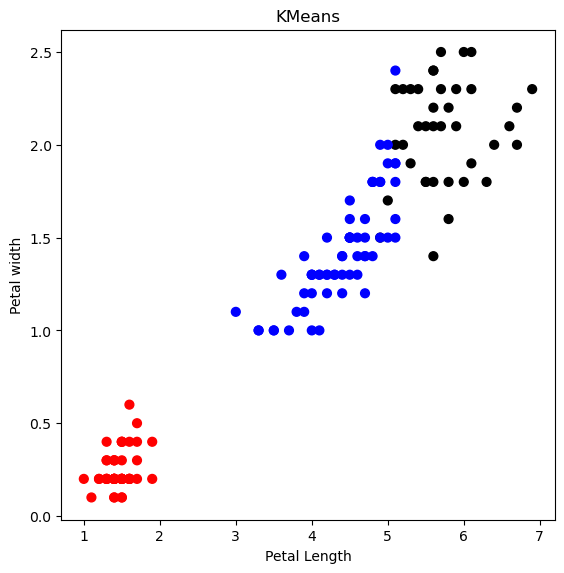

In [37]:
# K-PLOT
#Sepal_legth for K_means
#plt.subplot(1,3,2)
plt.figure(figsize=(14,14))
colormap=np.array(['red','blue','black'])
plt.subplot(2,2,1)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[predY],s=40)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('KMeans')

# K-PLOT
#plt.subplot(1,3,2)
plt.figure(figsize=(14,14))
colormap=np.array(['red','blue','black'])
plt.subplot(2,2,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('KMeans')

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GMM Classification')

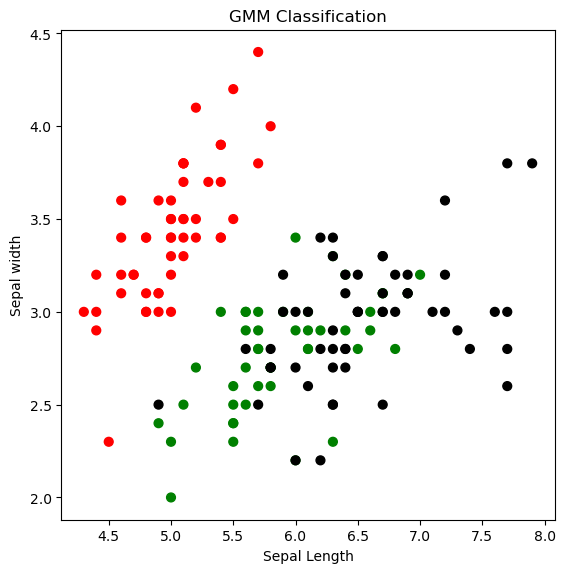

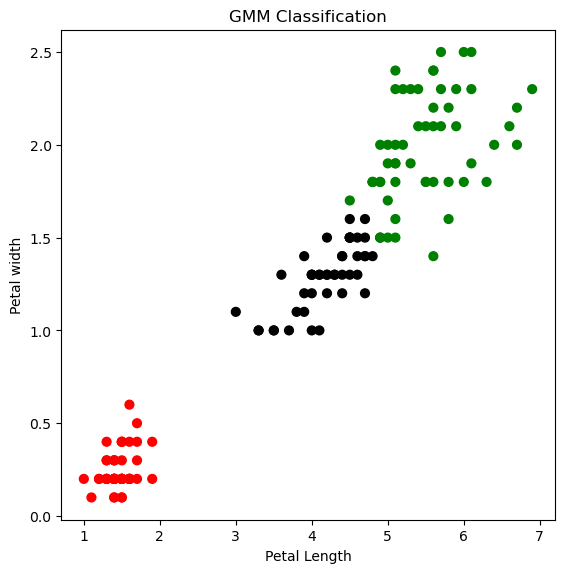

In [38]:
# GMM PLOT for Sepal_legth
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

plt.figure(figsize=(14,14))
colormap=np.array(['red','green','black'])

y_cluster_gmm=gmm.predict(xs)
#plt.subplot(1,3,3)
plt.subplot(2,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y_cluster_gmm],s=40)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('GMM Classification')

# GMM PLOT for petal_length
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

plt.figure(figsize=(14,14))
colormap=np.array(['red','green','black'])

y_cluster_gmm=gmm.predict(xs)
#plt.subplot(1,3,3)
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('GMM Classification')

In [39]:
#9 KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1)
print("Size of training data and its label",X_train.shape,y_train.shape)
print("Size of tetsing data and its label",X_test.shape,y_test.shape)

for i in range(len(iris.target_names)):
    print("Label",i,"-",str(iris.target_names[i]))

classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print("Results of Classification using KNN with k=1")
for r in range(0,len(X_test)):
    print("Sample:",str(X_test[r]),"Actual-label:",str(y_test[r]),"Predicted-label:",str(y_pred[r]))
print("Classification Accuracy:",classifier.score(X_test,y_test))

from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

Size of training data and its label (135, 4) (135,)
Size of tetsing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using KNN with k=1
Sample: [5.8 2.7 3.9 1.2] Actual-label: 1 Predicted-label: 1
Sample: [7.7 2.8 6.7 2. ] Actual-label: 2 Predicted-label: 2
Sample: [5.5 2.5 4.  1.3] Actual-label: 1 Predicted-label: 1
Sample: [5.6 2.9 3.6 1.3] Actual-label: 1 Predicted-label: 1
Sample: [6.  3.4 4.5 1.6] Actual-label: 1 Predicted-label: 1
Sample: [5.7 3.8 1.7 0.3] Actual-label: 0 Predicted-label: 0
Sample: [5.7 2.6 3.5 1. ] Actual-label: 1 Predicted-label: 1
Sample: [7.7 3.8 6.7 2.2] Actual-label: 2 Predicted-label: 2
Sample: [5.5 3.5 1.3 0.2] Actual-label: 0 Predicted-label: 0
Sample: [5.9 3.  5.1 1.8] Actual-label: 2 Predicted-label: 2
Sample: [6.3 3.3 6.  2.5] Actual-label: 2 Predicted-label: 2
Sample: [6.4 3.2 4.5 1.5] Actual-label: 1 Predicted-label: 1
Sample: [7.7 2.6 6.9 2.3] Actual-label: 2 Predicted-label: 2
Sam

(244, 2)


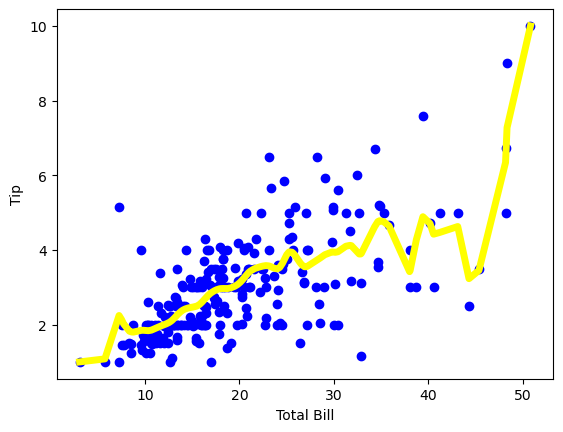

In [40]:
#10 locally weighted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r"C:\Users\harik\Downloads\10-dataset.csv")
data

colA=np.array(data.total_bill)
colB=np.array(data.tip)

colA

colB

mcolA=np.mat(colA)
mcolB=np.mat(colB)

mcolA

mcolB

m=np.shape(mcolB)[1]
one=np.ones((1,m),dtype=int)
X=np.hstack((one.T,mcolA.T))
print(X.shape)

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wt=kernel(point,xmat,k)
    W=(X.T*(wt*X)).I*(X.T*wt*ymat.T)
    return W

def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

ypred=localWeightRegression(X,mcolB,0.8)



xsort=X.copy()
xsort.sort(axis=0)
plt.scatter(colA,colB,color='blue')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()
